In [3]:
import pandas as pd
%matplotlib inline
%pylab inline
import pprint

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
pylab.rcParams['figure.figsize'] = (20, 10) 

plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('./AQdata_clean.csv')

In [5]:
df.columns

Index(['DateTime', 'idx', 'Date', 'Day', 'Hour', 'Weekday', 'Week', 'Month',
       'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH',
       'AH', 'ewma'],
      dtype='object')

In [6]:
df = df.rename(columns={'ewma': 'AQI'})
AQcol = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH',
       'AH','AQI']
AQcol_PT08 = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)','PT08.S5(O3)']
AQcol_GT = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

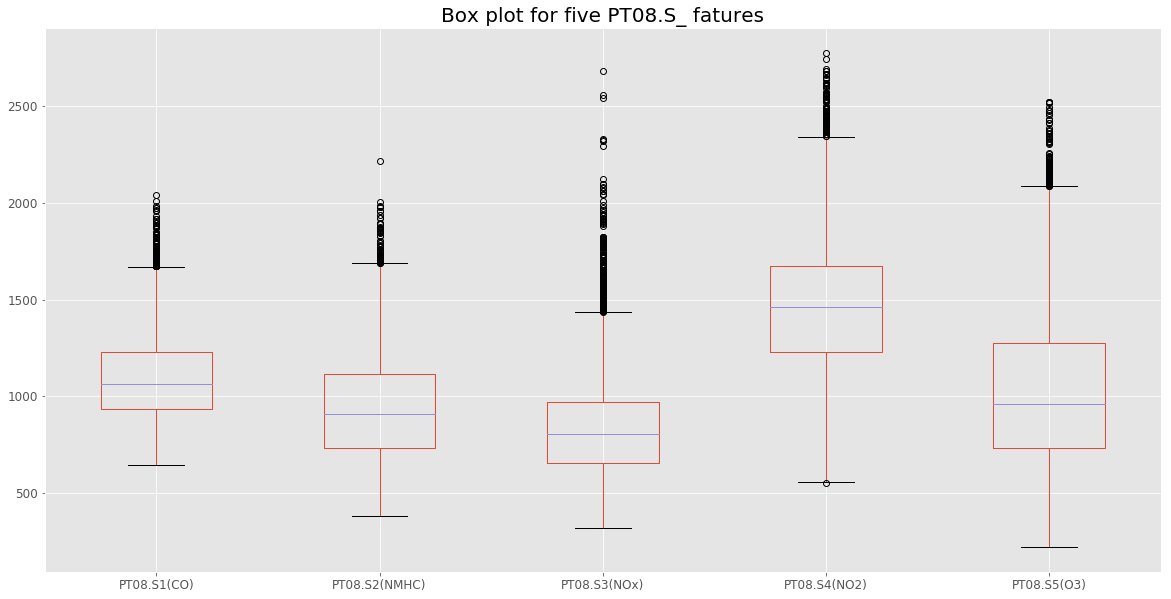

In [7]:
df[AQcol_PT08].plot.box()
plt.title('Box plot for five PT08.S_ fatures', fontsize = 20)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108aea780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114543438>]], dtype=object)

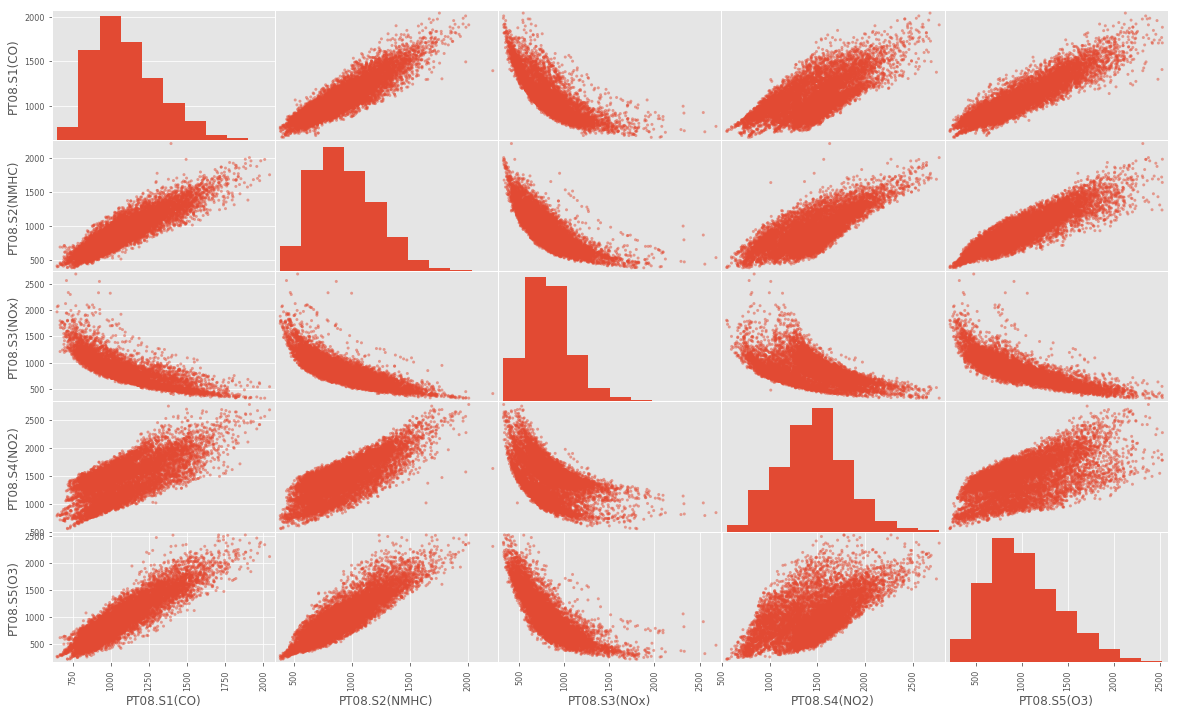

In [10]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df[AQcol_PT08], figsize=(20, 12))

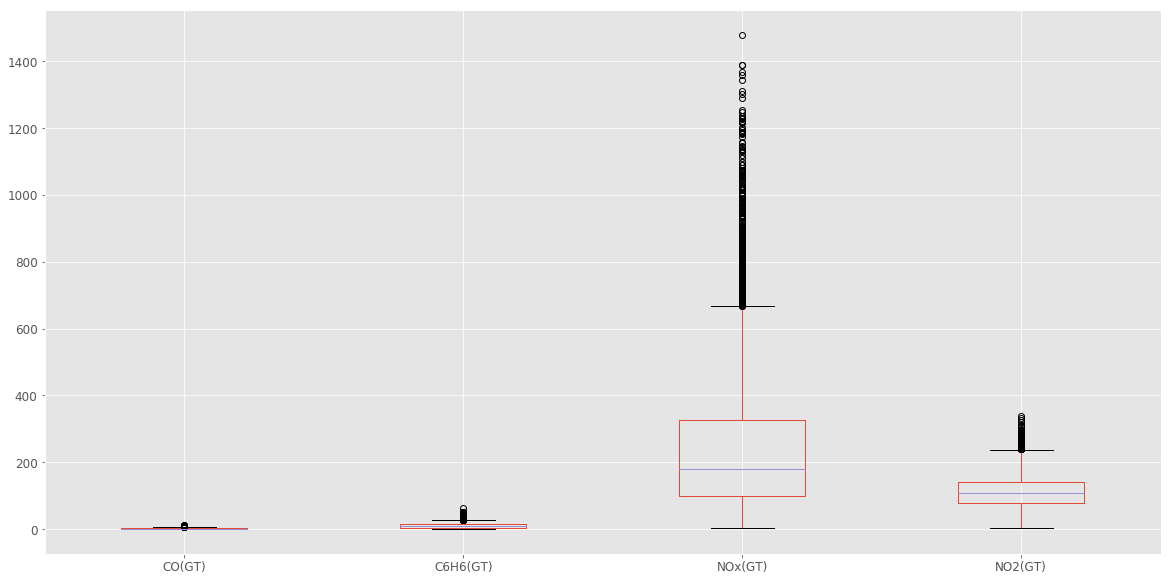

In [9]:
df[AQcol_GT].plot.box()

In [230]:
#reset index
df.index = df['DateTime']

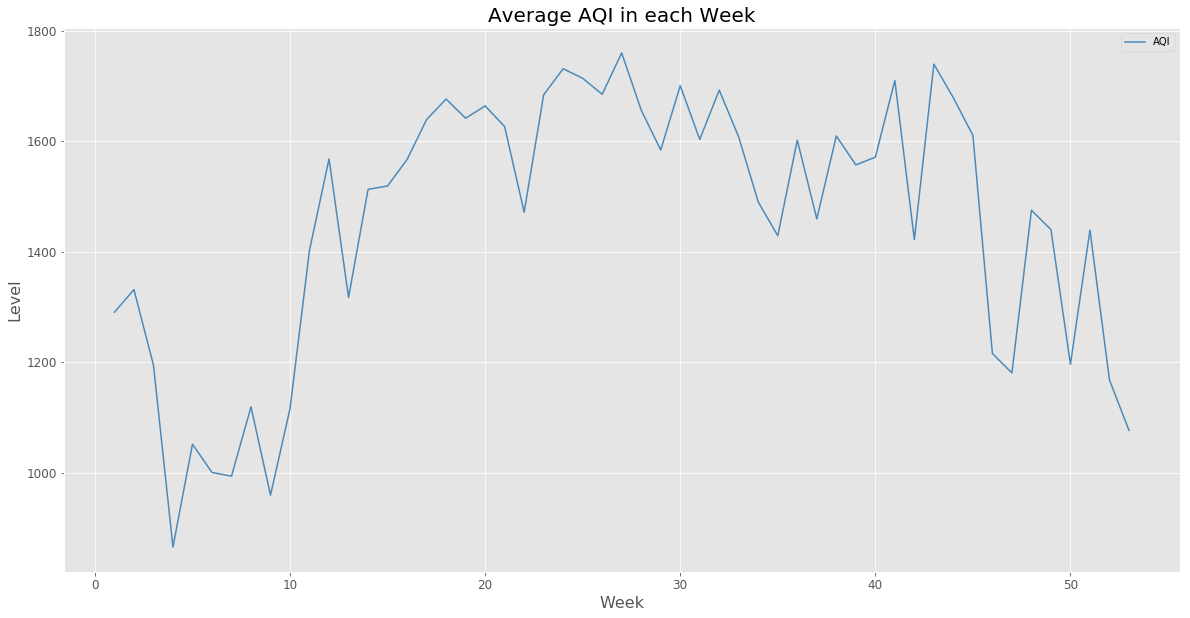

In [231]:
# df2[:2000].groupby('Date')['ewma'].max().plot()
df.groupby('Week')['AQI'].mean().plot(legend = True, color = '#4A89B9')
plt.title('Average AQI in each Week', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Week',fontsize = 16)

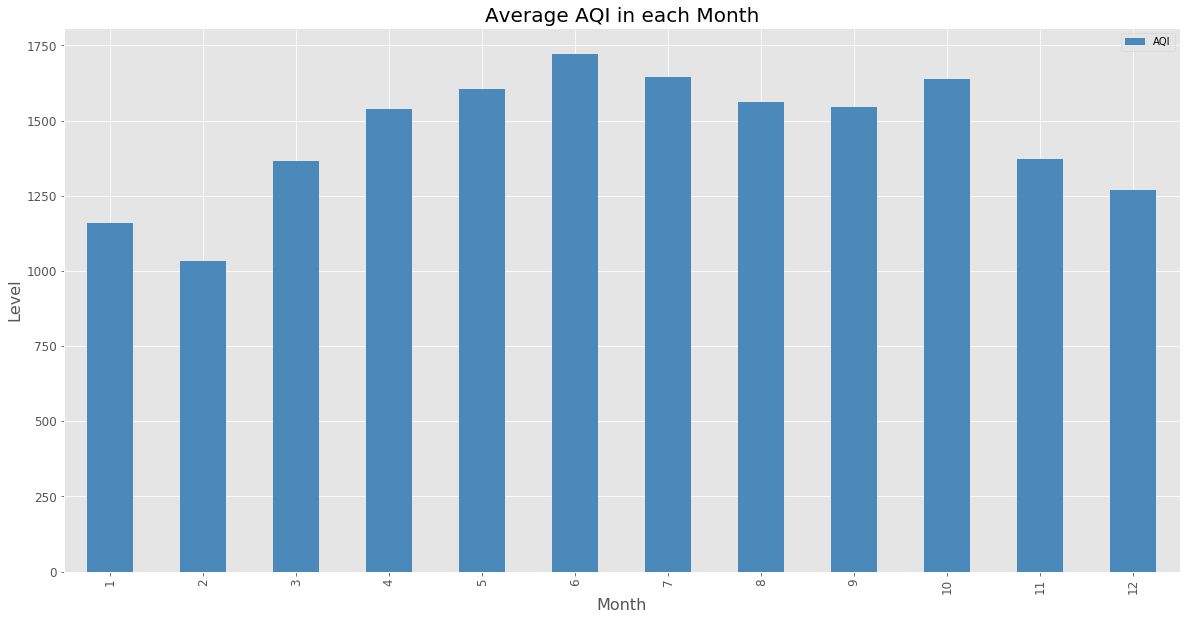

In [232]:
df.groupby('Month')['AQI'].mean().plot.bar(legend = True,color = '#4A89B9')
plt.title('Average AQI in each Month', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Month',fontsize = 16)

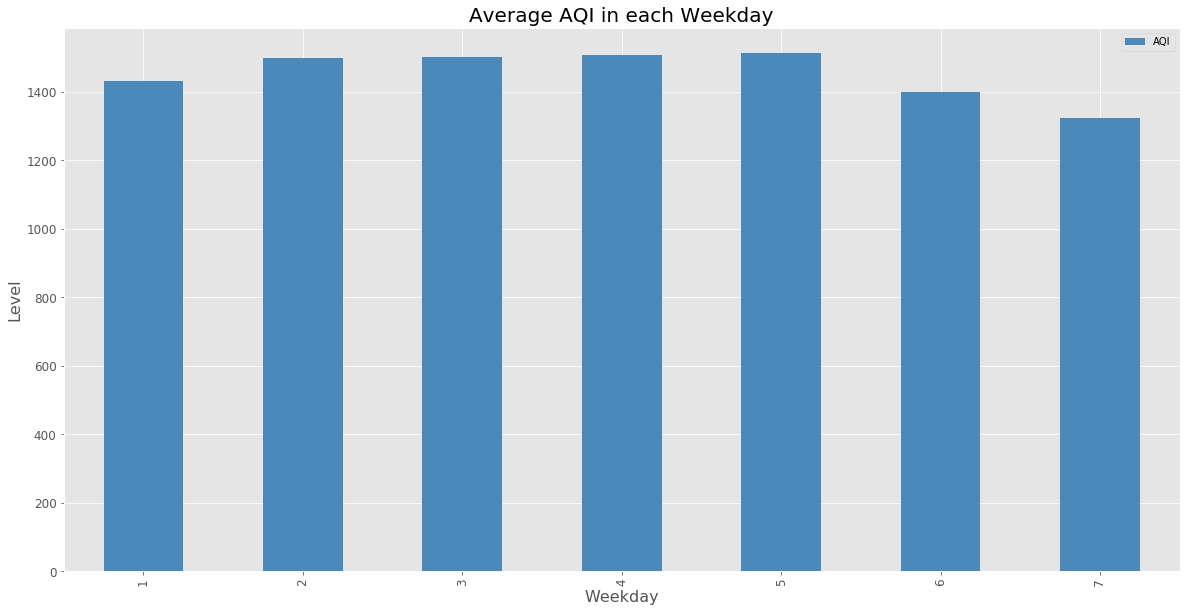

In [233]:
df.groupby('Weekday')['AQI'].mean().plot.bar(legend = True,color = '#4A89B9')
plt.title('Average AQI in each Weekday', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Weekday',fontsize = 16)

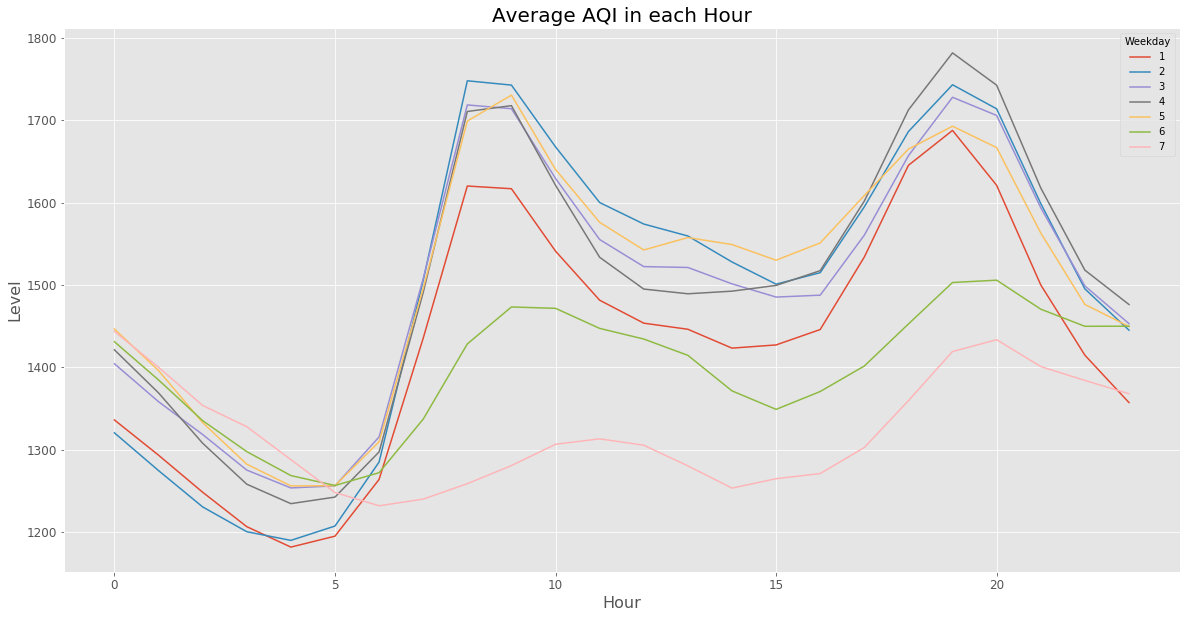

In [234]:
df.groupby(['Hour','Weekday'])['AQI'].mean().unstack().plot(legend = True)
plt.title('Average AQI in each Hour', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Hour',fontsize = 16)

In [236]:
def generate_season(df):
    df['Season'] = df.apply(lambda row: (row['Month']%12 + 3)//3, axis=1)
generate_season(df)
df = df[['DateTime', 'idx', 'Date', 'Day', 'Hour', 'Weekday', 'Week', 'Month', 'Season',
       'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH',
       'AH', 'AQI']]

In [237]:
df.head()

DateTime  idx        Date  Day  Hour  Weekday  \
DateTime                                                                        
2004-03-10 18:00:00  2004-03-10 18:00:00    0  2004-03-10   10    18        3   
2004-03-10 19:00:00  2004-03-10 19:00:00    1  2004-03-10   10    19        3   
2004-03-10 20:00:00  2004-03-10 20:00:00    2  2004-03-10   10    20        3   
2004-03-10 21:00:00  2004-03-10 21:00:00    3  2004-03-10   10    21        3   
2004-03-10 22:00:00  2004-03-10 22:00:00    4  2004-03-10   10    22        3   

                     Week  Month  Season  PT08.S1(CO)     ...       \
DateTime                                                  ...        
2004-03-10 18:00:00    11      3       2       1360.0     ...        
2004-03-10 19:00:00    11      3       2       1292.0     ...        
2004-03-10 20:00:00    11      3       2       1402.0     ...        
2004-03-10 21:00:00    11      3       2       1376.0     ...        
2004-03-10 22:00:00    11      3       2       1272.0     ...        

                     PT08.S4(NO2)  PT08.S5(O3)  CO(GT)  C6H6(GT)  NOx(GT)  \
DateTime                                                                    
2004-03-10 18:00:00        1692.0       1268.0     2.6      11.9    166.0   
2004-03-10 19:00:00        1559.0        972.0     2.0       9.4    103.0   
2004-03-10 20:00:00        1555.0       1074.0     2.2       9.0    131.0   
2004-03-10 21:00:00        1584.0       1203.0     2.2       9.2    172.0   
2004-03-10 22:00:00        1490.0       1110.0     1.6       6.5    131.0   

                     NO2(GT)     T    RH      AH          AQI  
DateTime                                                       
2004-03-10 18:00:00    113.0  13.6  48.9  0.7578  1692.000000  
2004-03-10 19:00:00     92.0  13.3  47.7  0.7255  1592.250000  
2004-03-10 20:00:00    114.0  11.9  54.0  0.7502  1566.461538  
2004-03-10 21:00:00    122.0  11.0  60.0  0.7867  1578.300000  
2004-03-10 22:00:00    116.0  11.2  59.6  0.7888  1519.190083  

[5 rows x 22 columns]

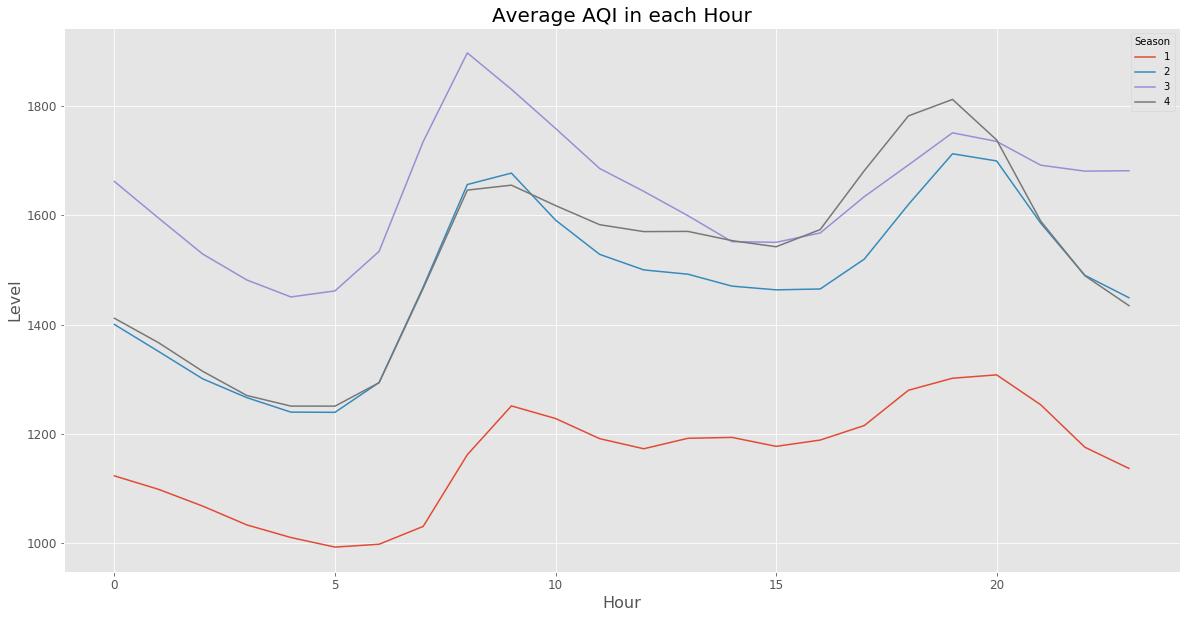

In [243]:
df.groupby(['Hour','Season'])['AQI'].mean().unstack().plot(legend = True)
plt.title('Average AQI in each Hour', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Hour',fontsize = 16)

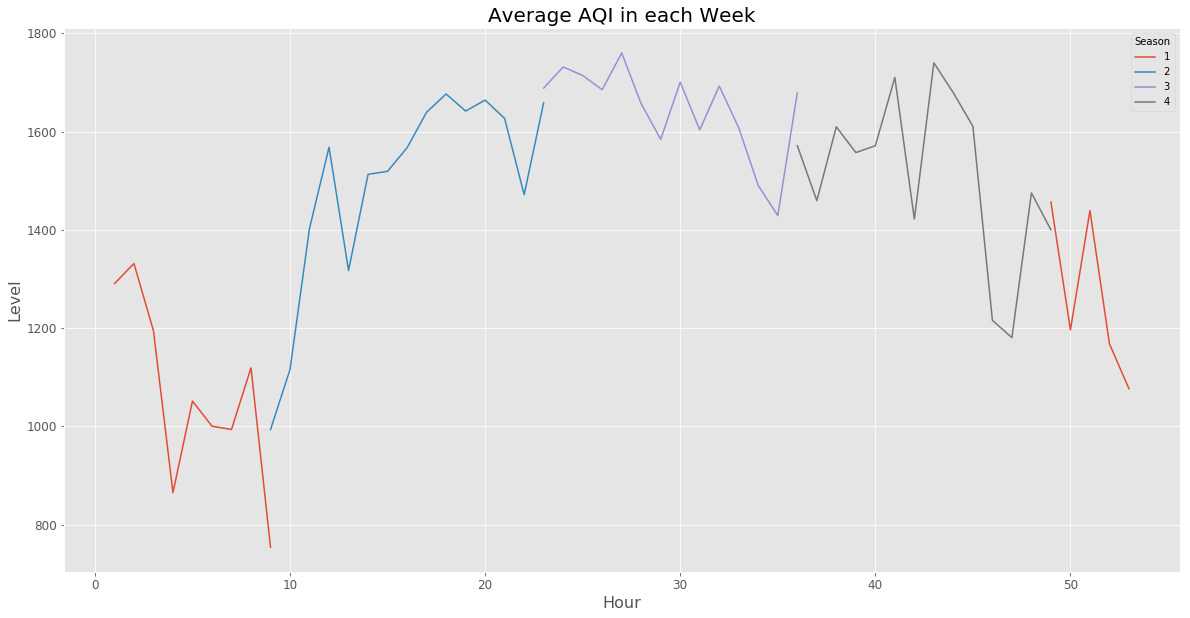

In [246]:
df.groupby(['Week','Season'])['AQI'].mean().unstack().plot(legend = True)
plt.title('Average AQI in each Week', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Hour',fontsize = 16)

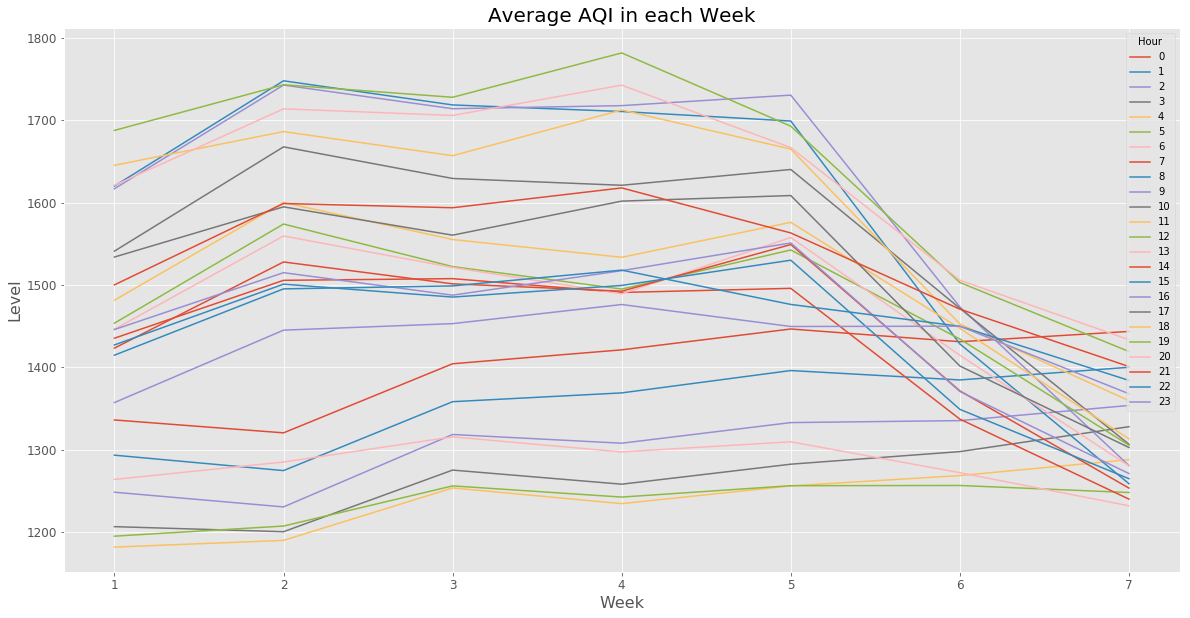

In [253]:
df.groupby(['Weekday','Hour'])['AQI'].mean().unstack().plot(legend = True)
plt.title('Average AQI in each Week', fontsize = 20)
pylab.ylabel('Level',fontsize = 16)
pylab.xlabel('Week',fontsize = 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108ce7320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109aa72e8>]], dtype=object)

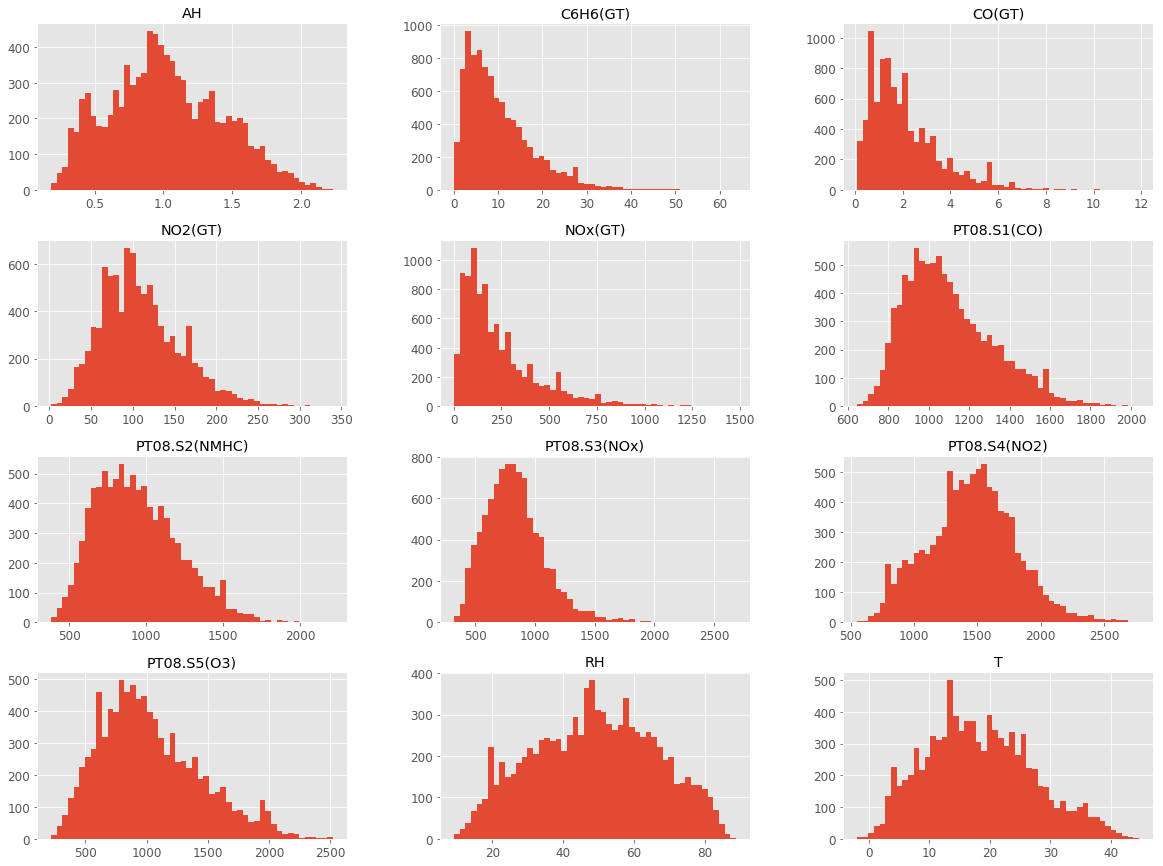

In [14]:
#'After replace missing value'
air = df[AQcol]
air.hist(bins=50, figsize=(20,15))

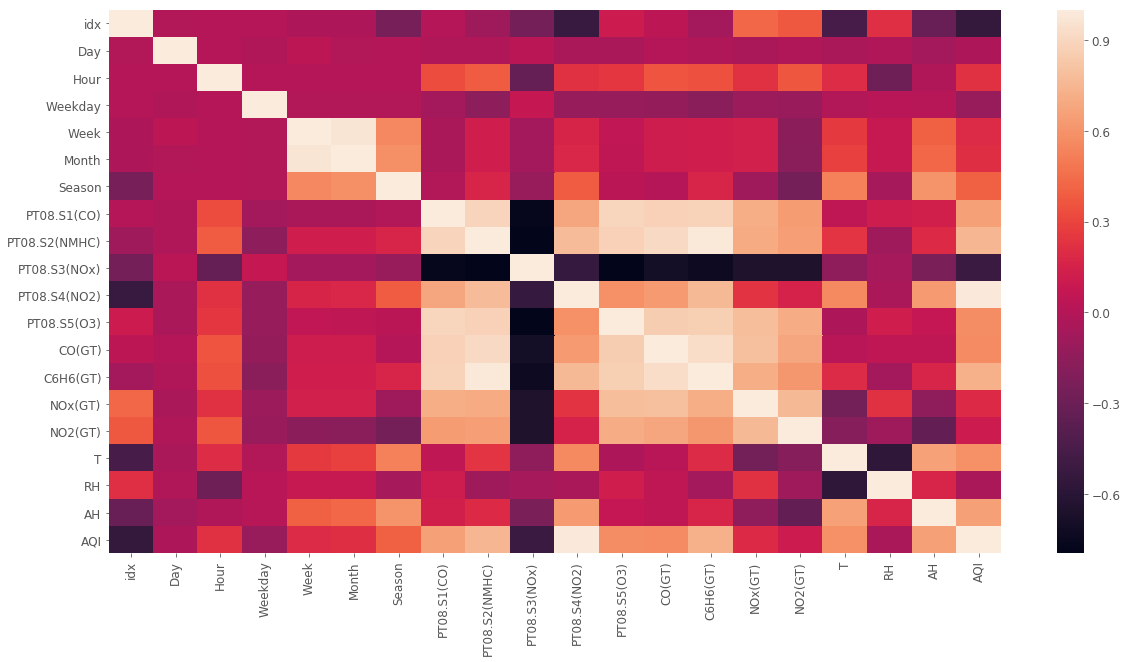

In [257]:
import seaborn as sns
pylab.rcParams['figure.figsize'] = (20, 10) 

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [263]:
df.corr()['AQI'].sort_values()

idx             -0.547952
PT08.S3(NOx)    -0.521679
Weekday         -0.110188
RH              -0.042416
Day             -0.028217
NO2(GT)          0.108375
NOx(GT)          0.190435
Week             0.193906
Month            0.209171
Hour             0.223788
Season           0.397805
CO(GT)           0.567791
PT08.S5(O3)      0.573614
T                0.589130
AH               0.653837
PT08.S1(CO)      0.655639
C6H6(GT)         0.730844
PT08.S2(NMHC)    0.749167
PT08.S4(NO2)     0.988260
AQI              1.000000
Name: AQI, dtype: float64

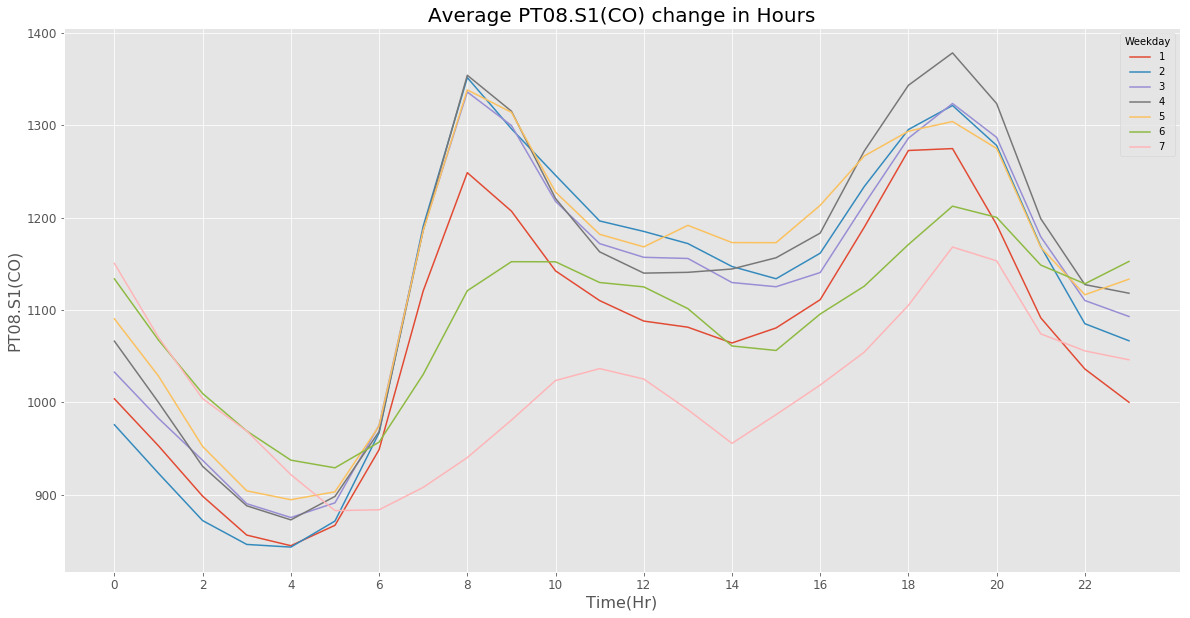

In [255]:
pylab.rcParams['figure.figsize'] = (20, 10) 

def generate_plot(column_name):
    col = column_name
    df.groupby(['Hour','Weekday'])['{}'.format(col)].mean().unstack().plot(legend = True)
    plt.title('Average {} change in Hours'.format(col), fontsize = 20)
    pylab.ylabel('{}'.format(col),fontsize = 16)
    pylab.xlabel('Time(Hr)',fontsize = 16)
    plt.xticks(np.arange(0, 23, 2.0))
    plt.savefig('plot {} change in hours.png'.format(column_name))
generate_plot('PT08.S1(CO)')

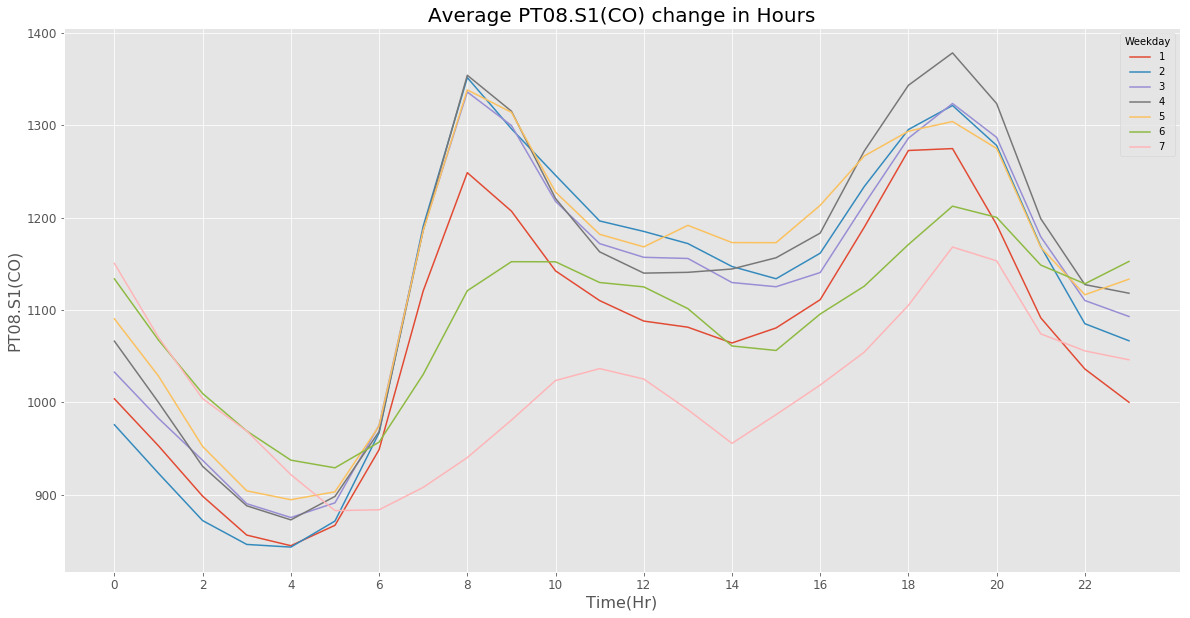

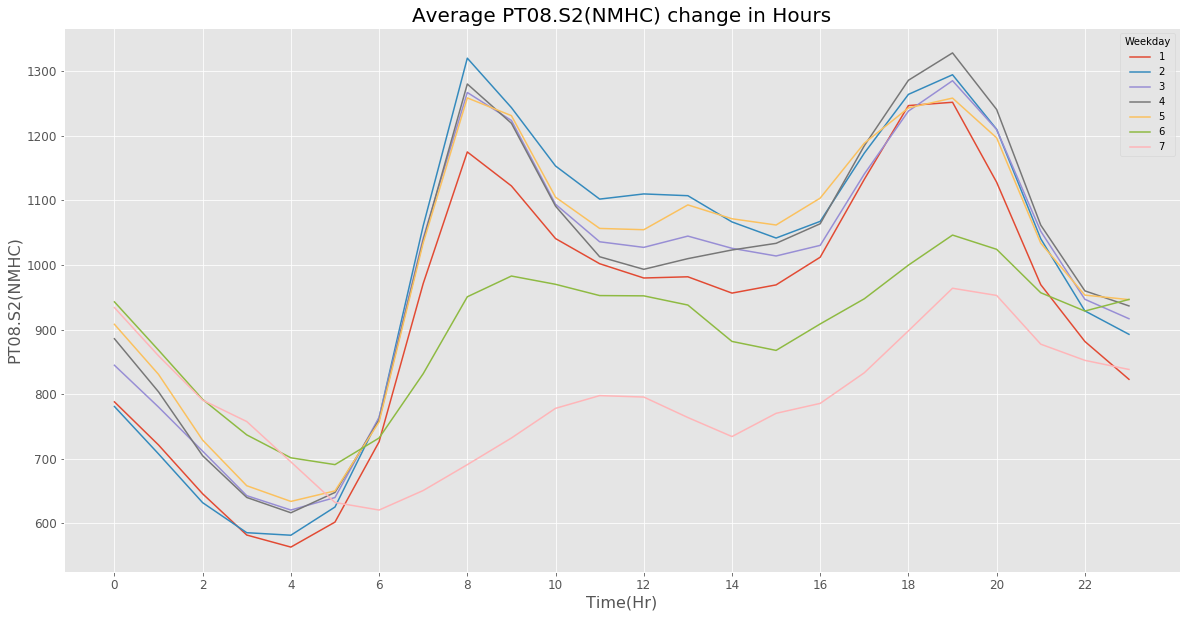

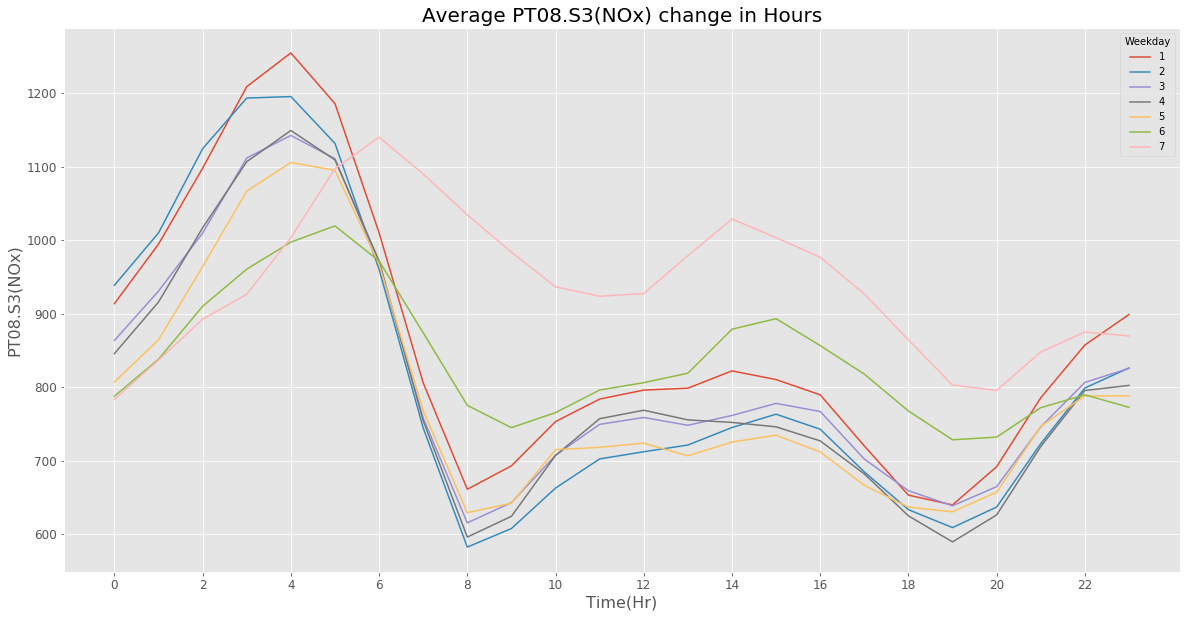

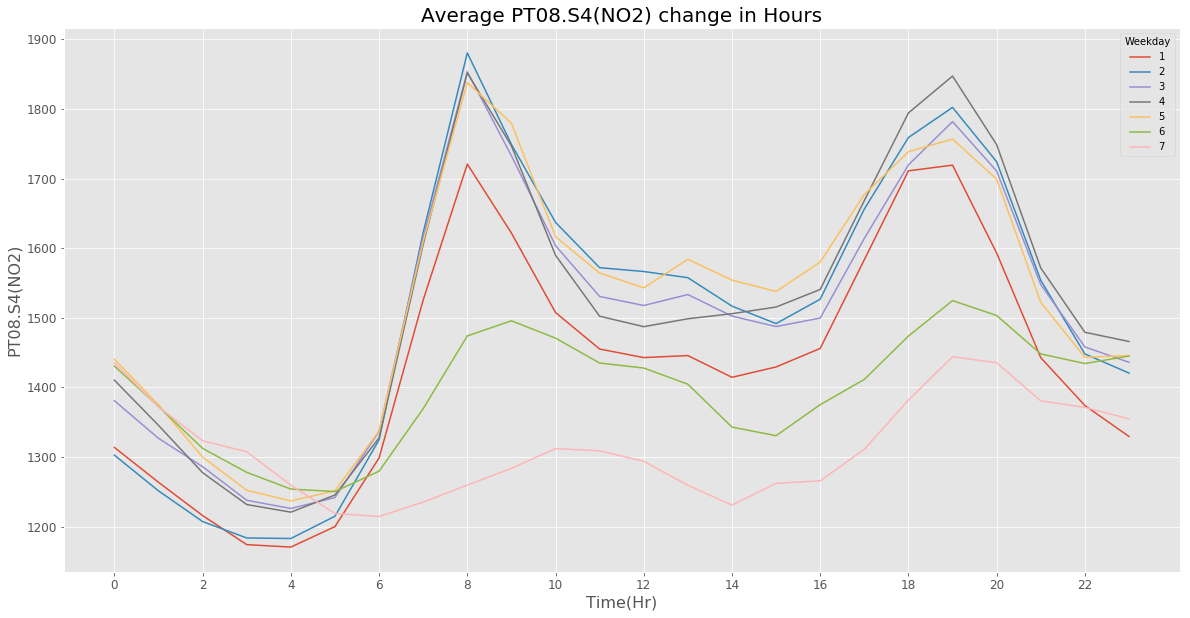

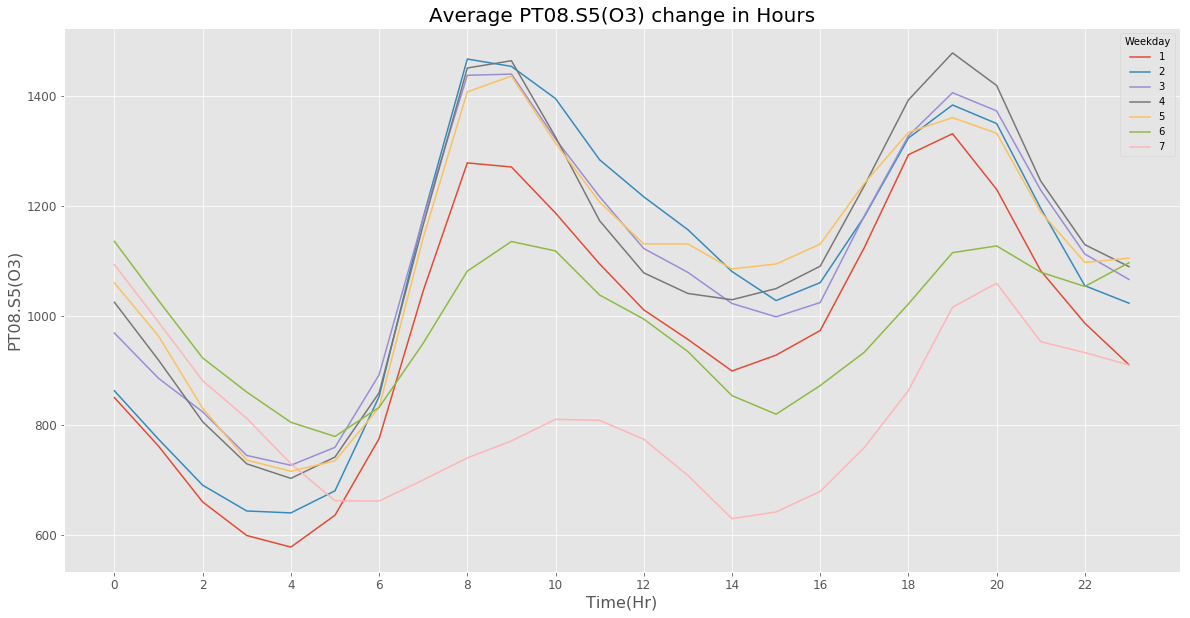

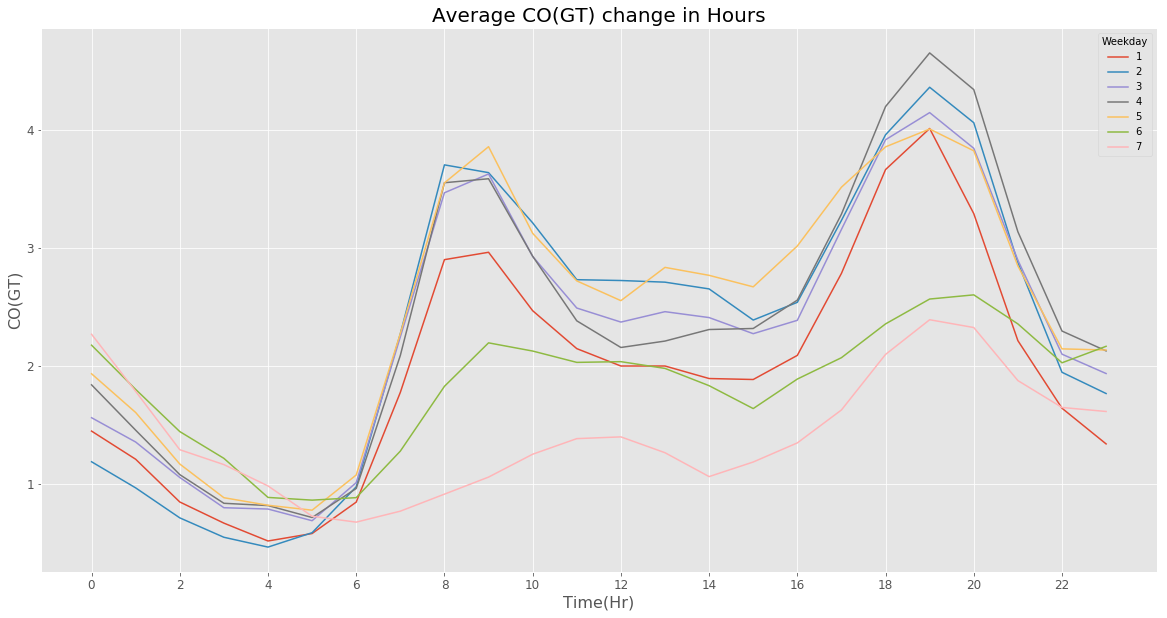

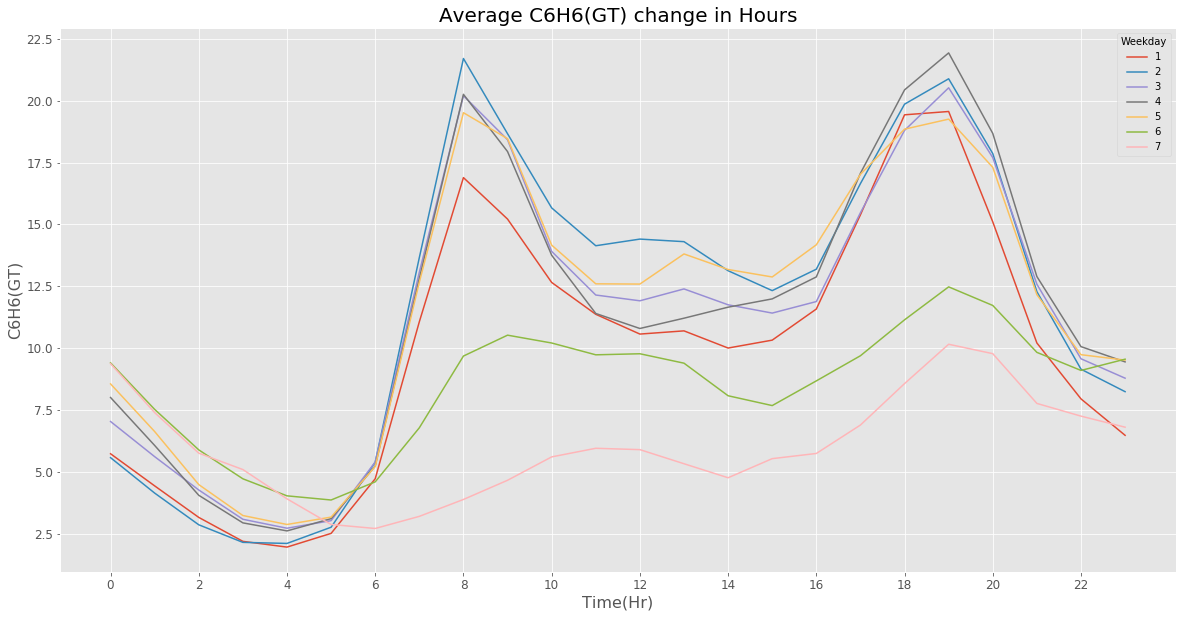

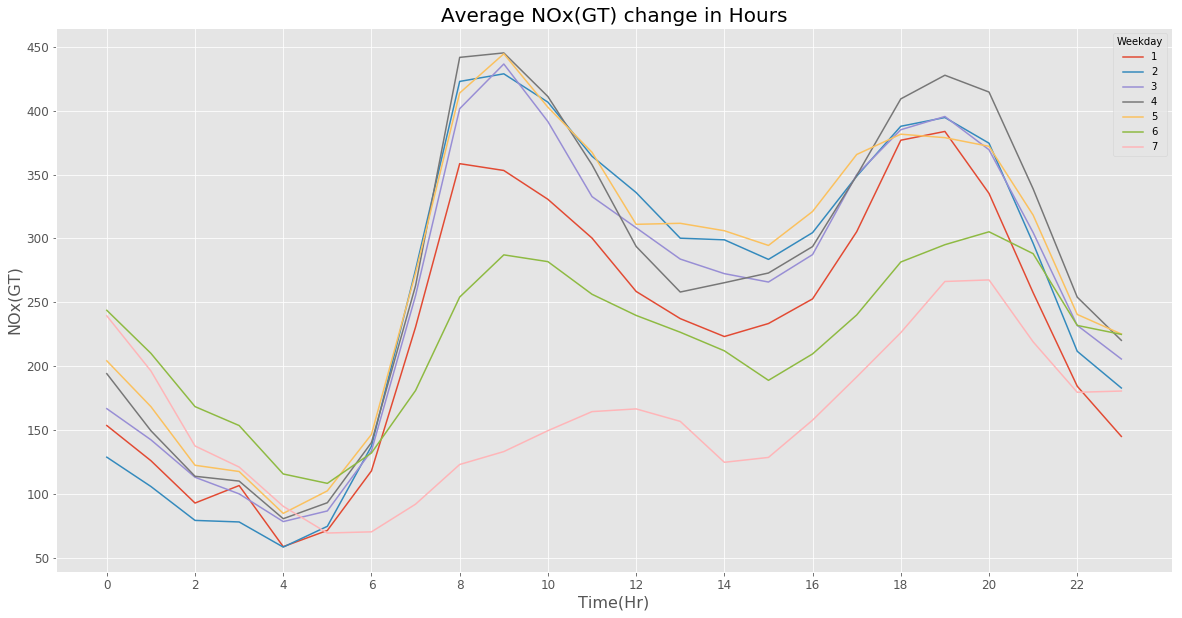

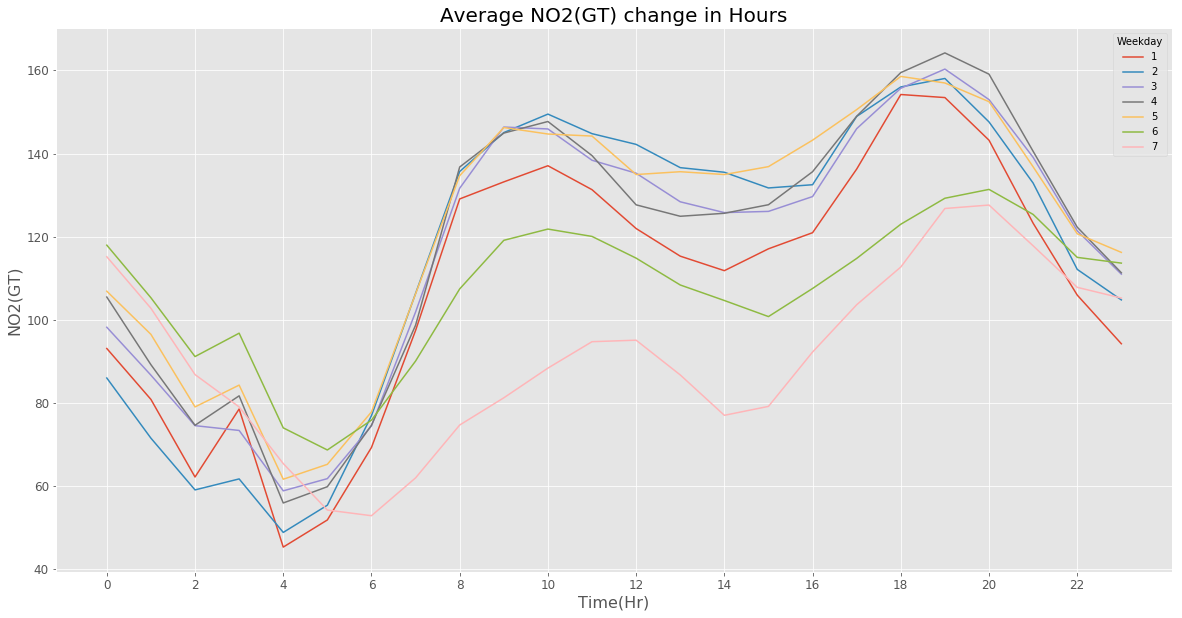

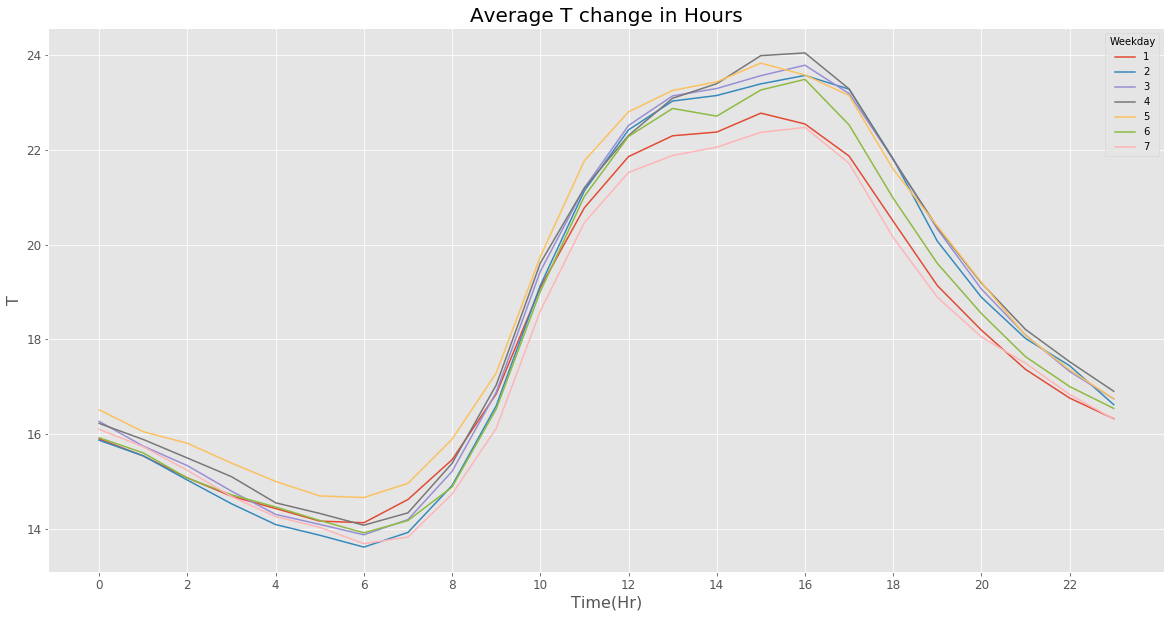

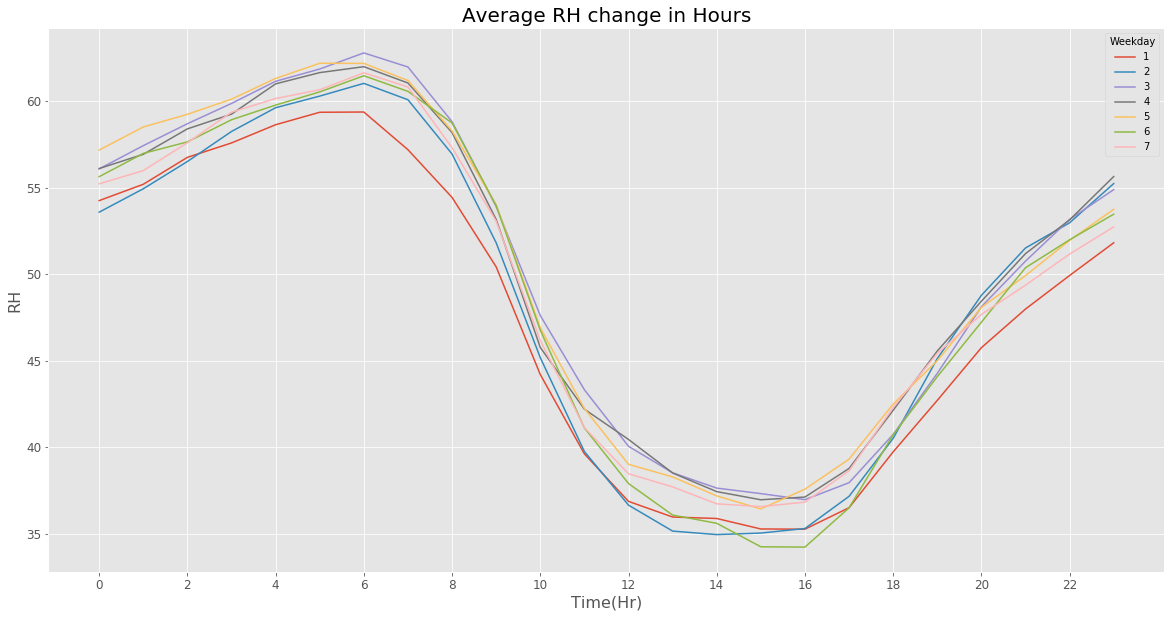

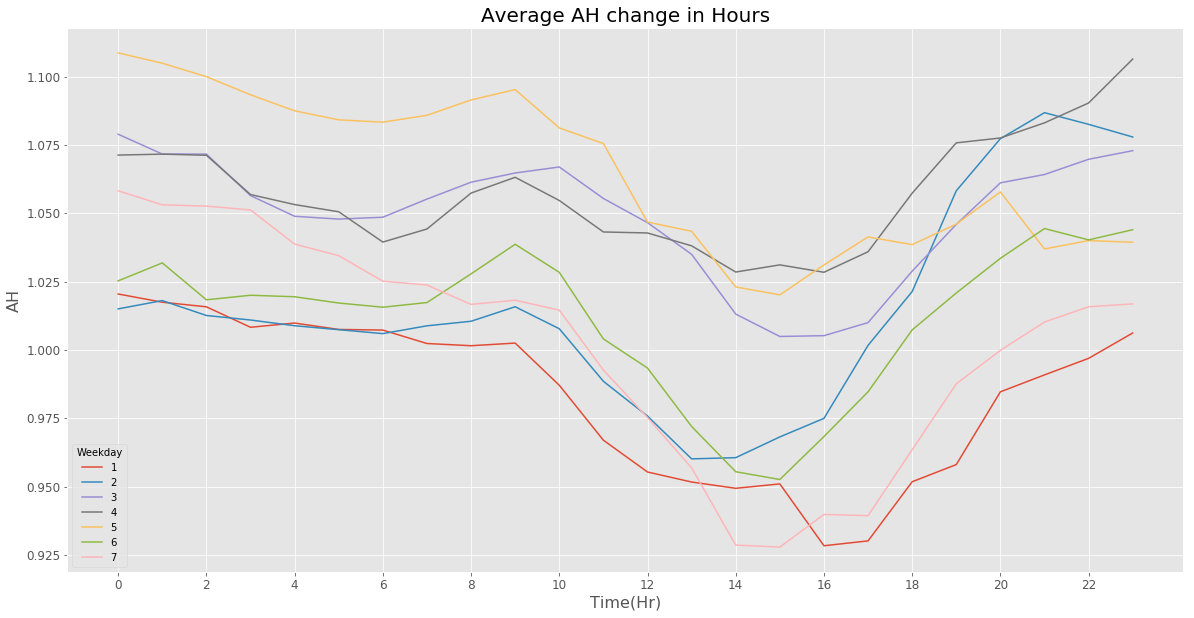

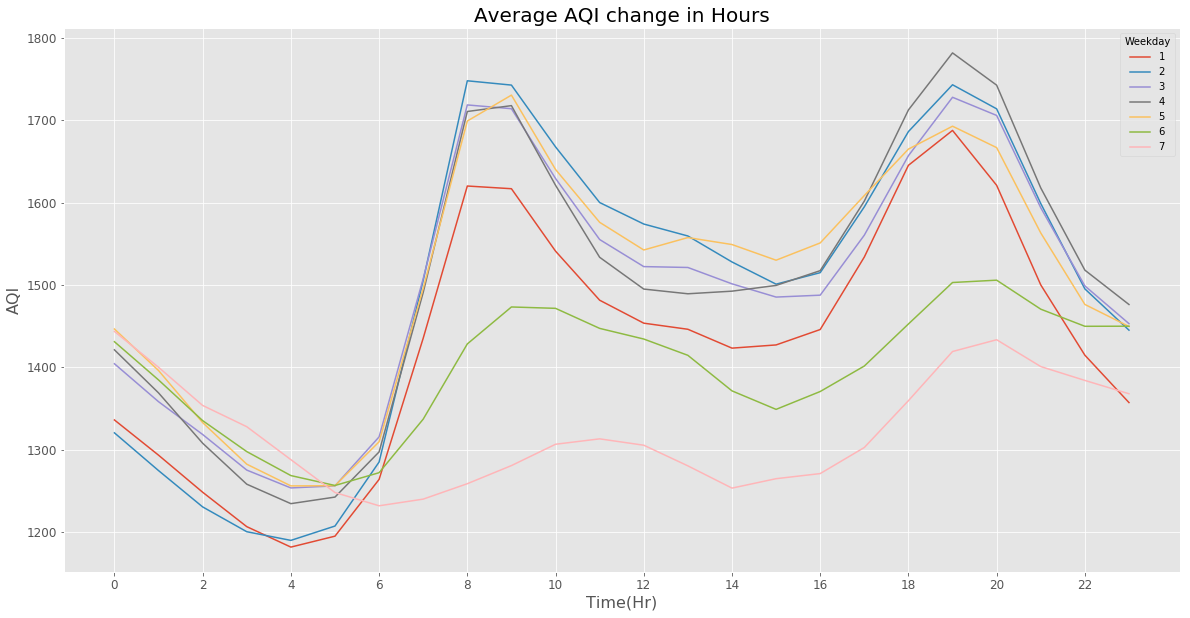

In [256]:
for col in AQcol:
    generate_plot(col)

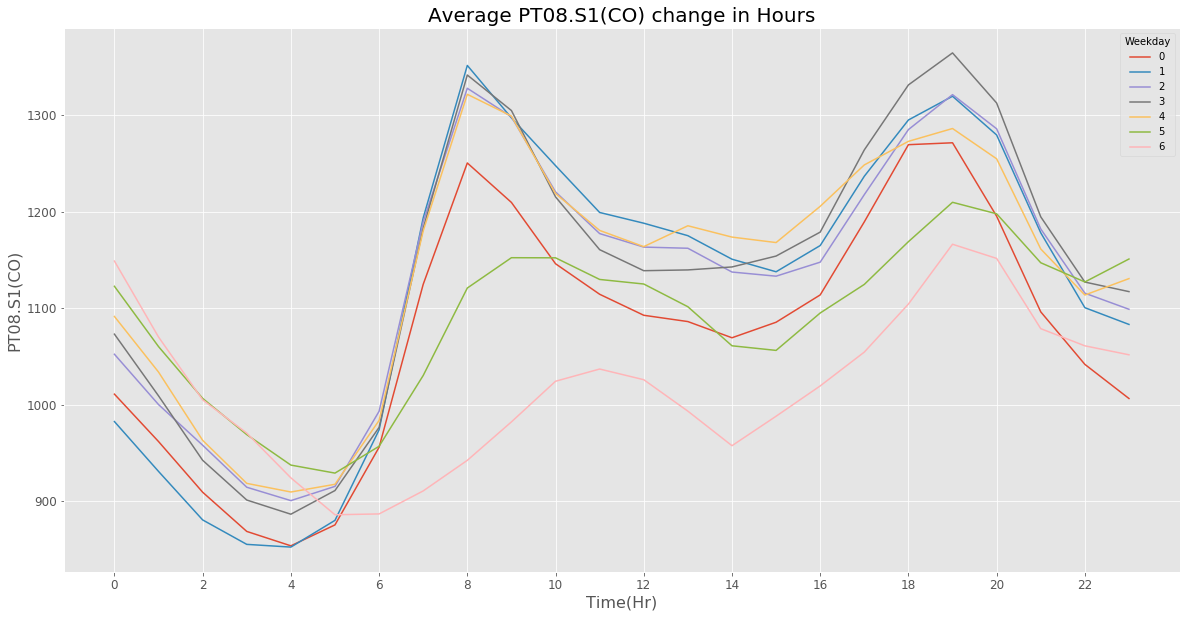

In [24]:
pylab.rcParams['figure.figsize'] = (20, 10) 

def generate_weekday_plot(column_name):
    col = column_name
    df.groupby(['Weekday','Month'])['{}'.format(col)].mean().unstack().plot(legend = True)
    plt.title('Average {} change in Hours'.format(col), fontsize = 20)
    pylab.ylabel('{}'.format(col),fontsize = 16)
    pylab.xlabel('Time(Hr)',fontsize = 16)
generate_plot('PT08.S1(CO)')

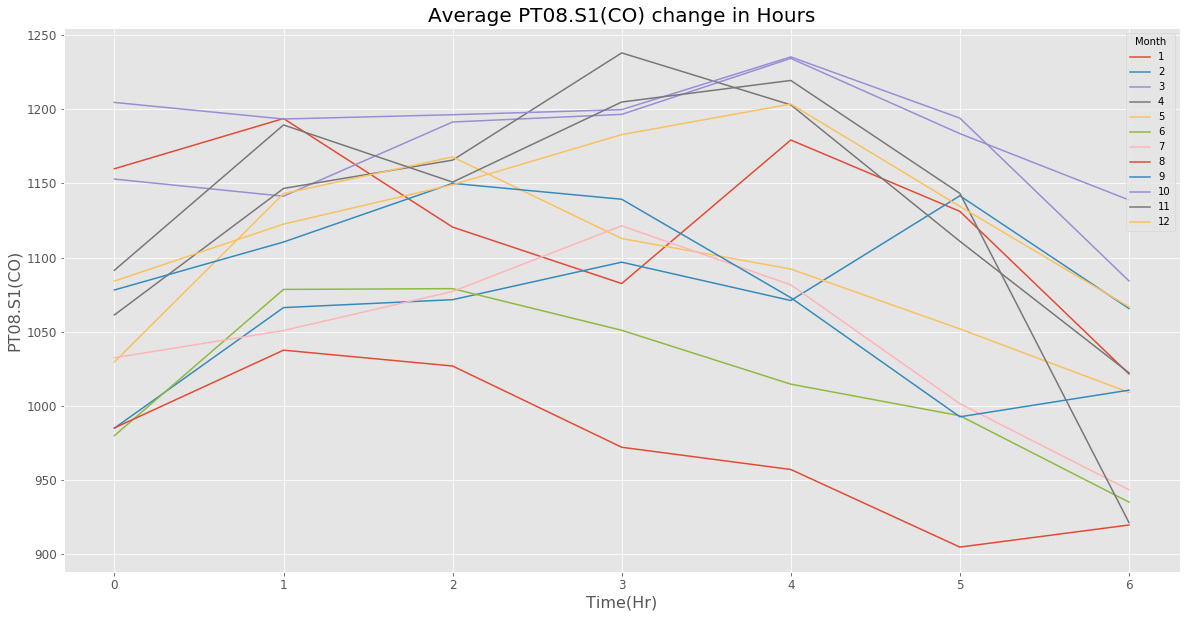

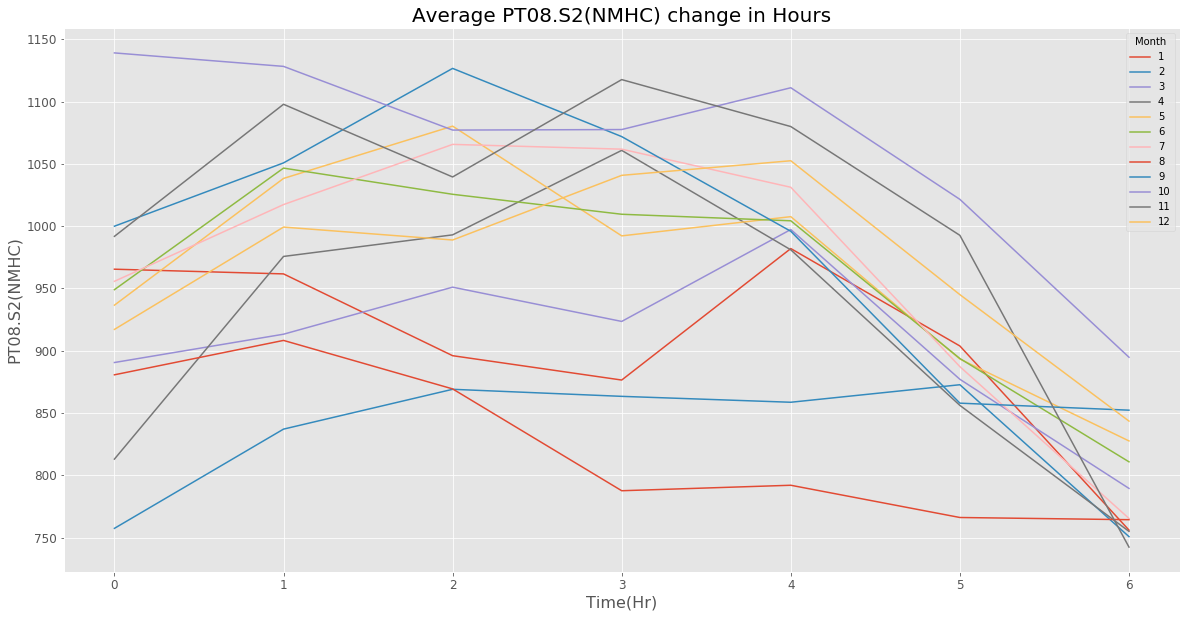

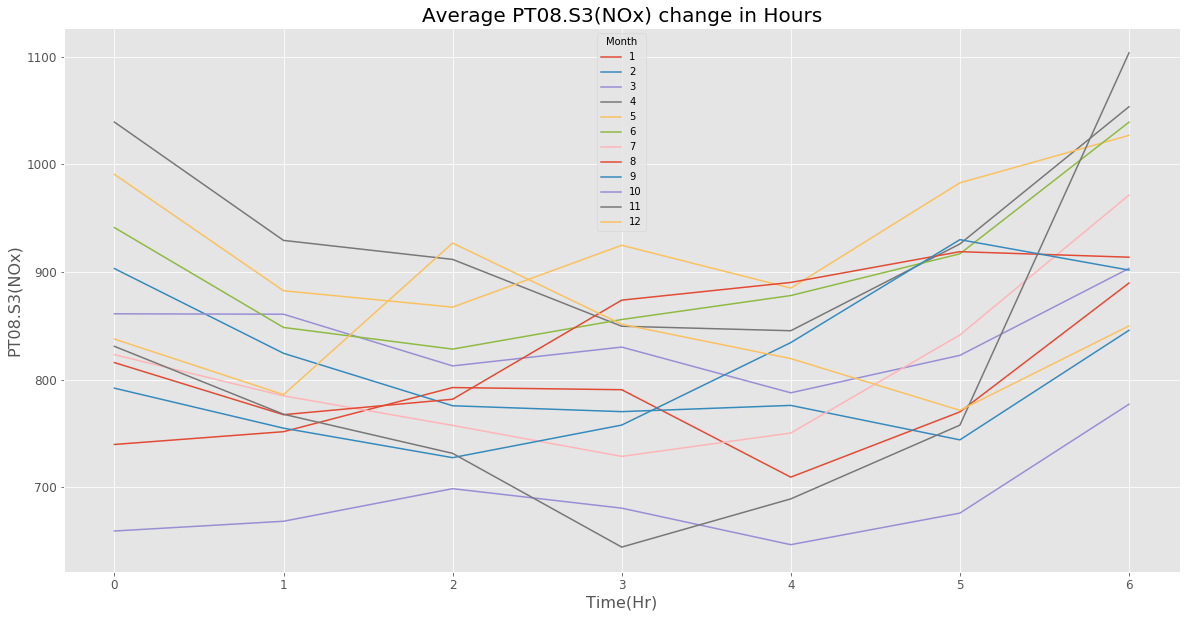

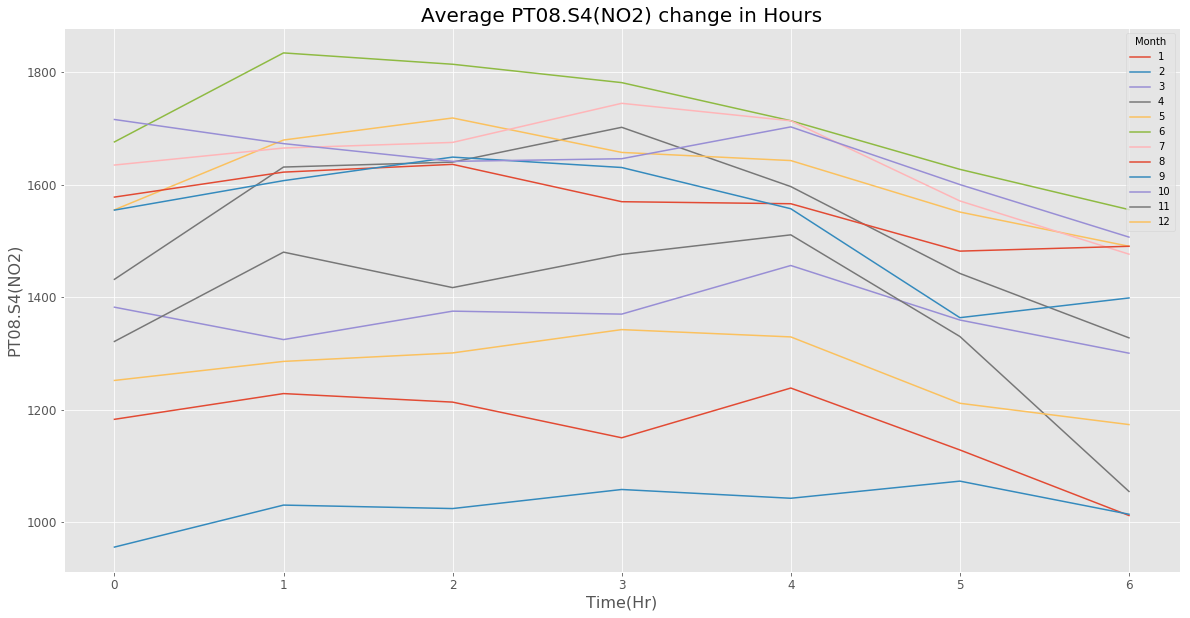

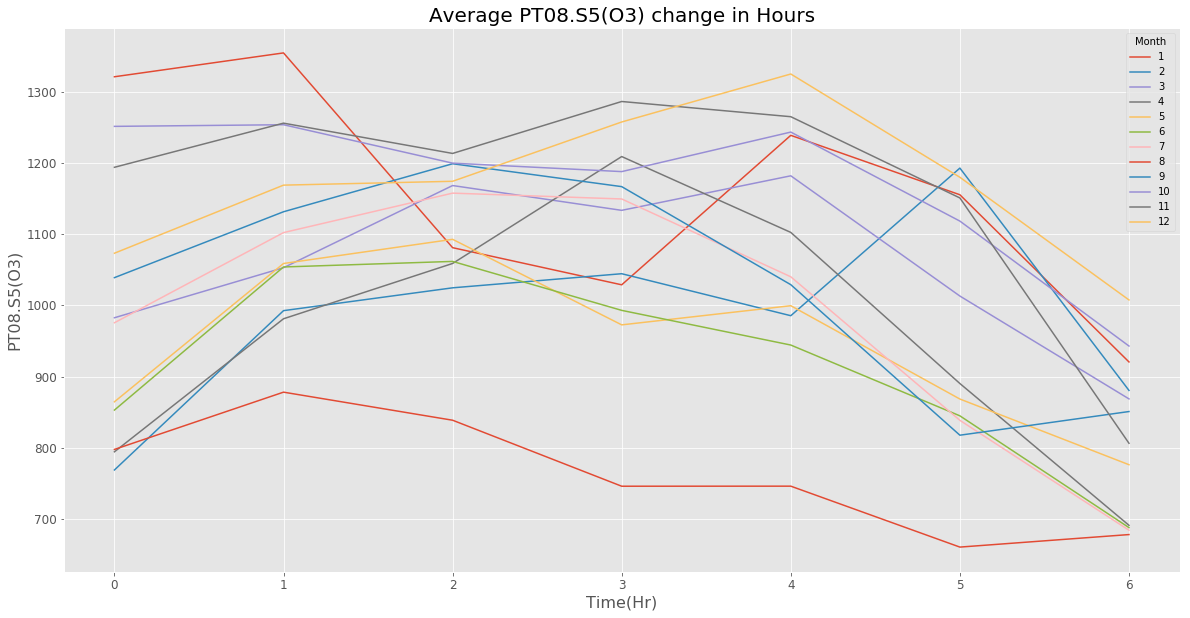

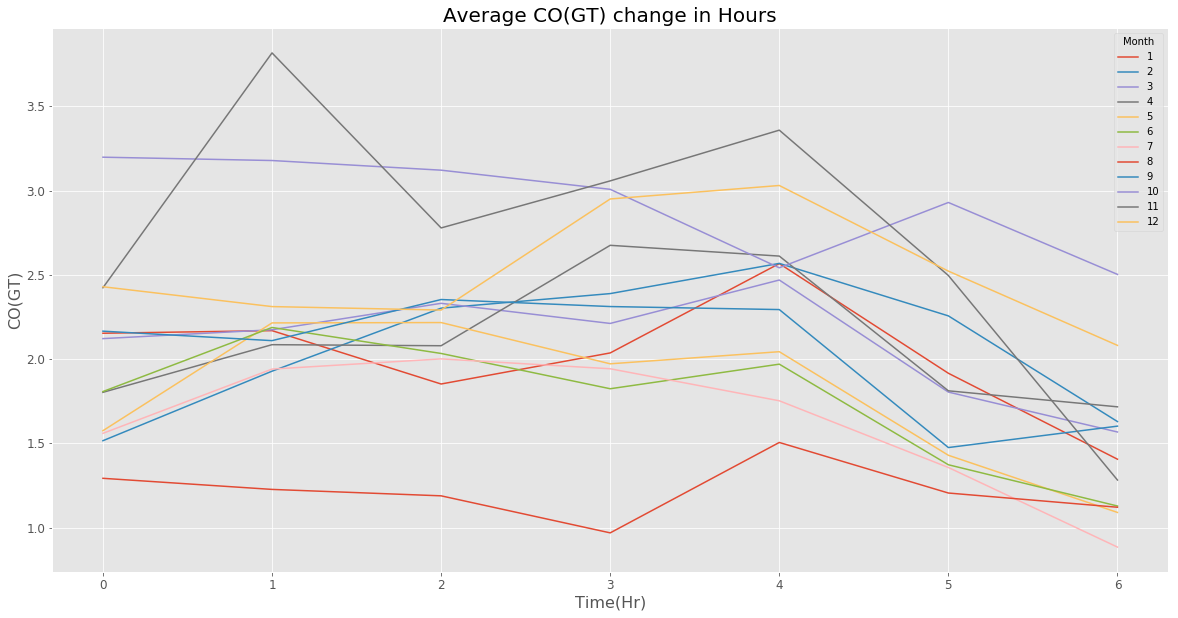

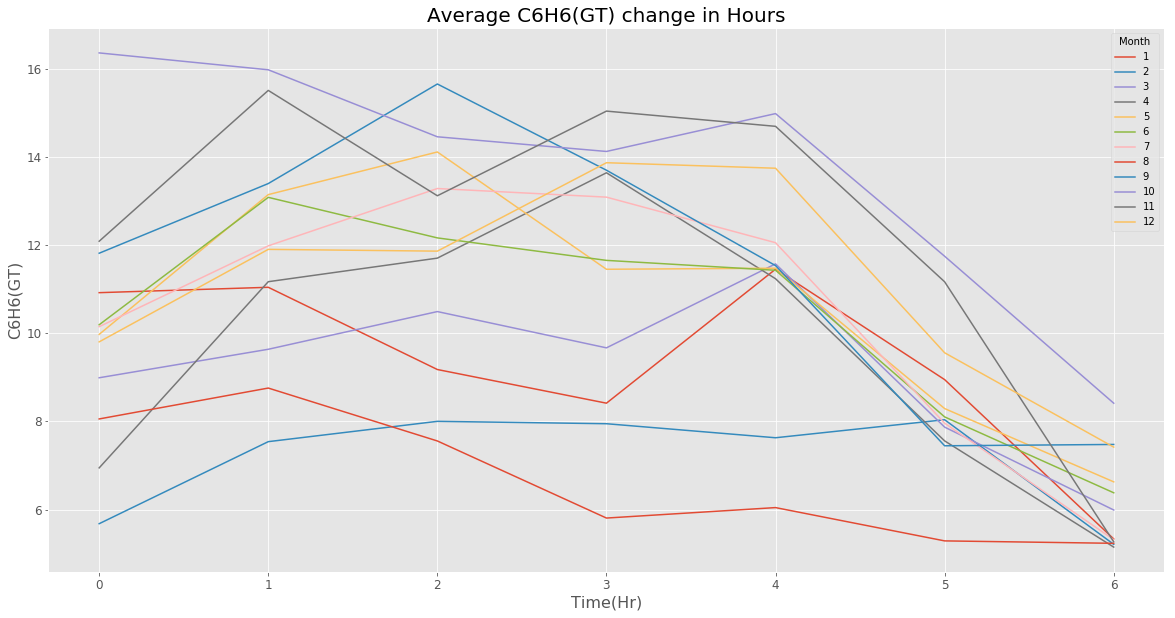

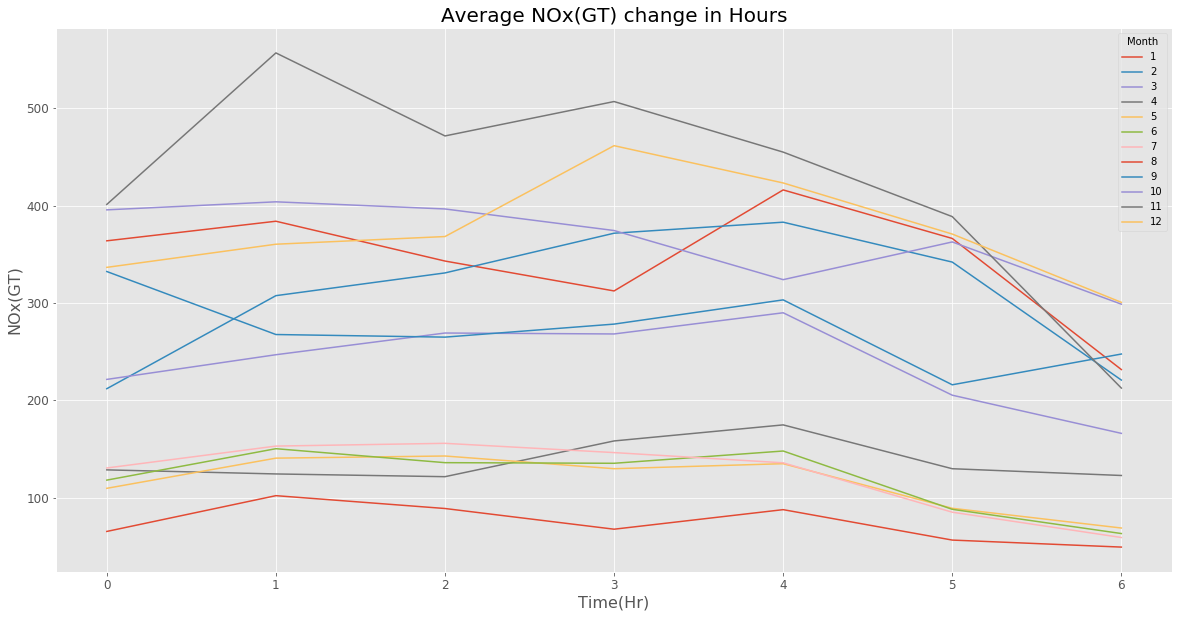

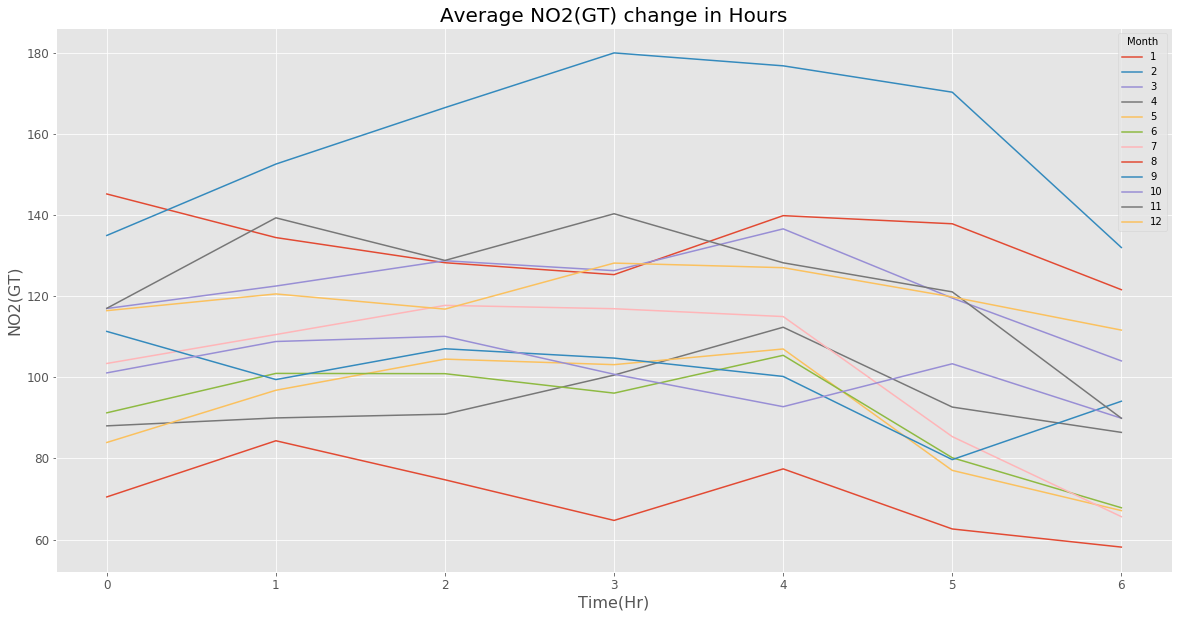

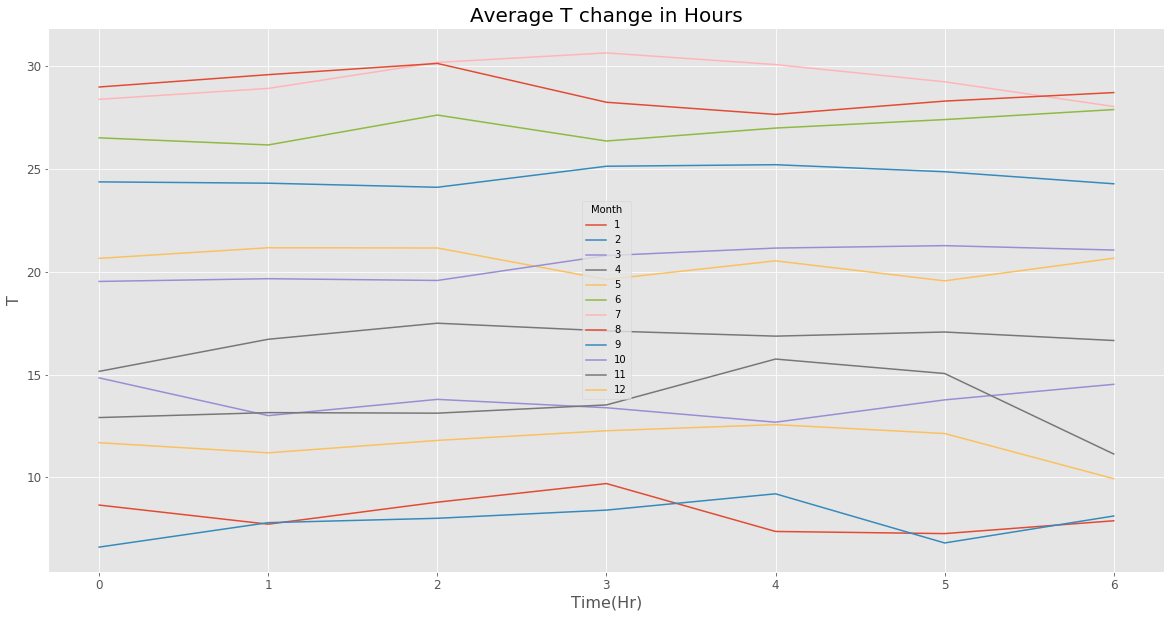

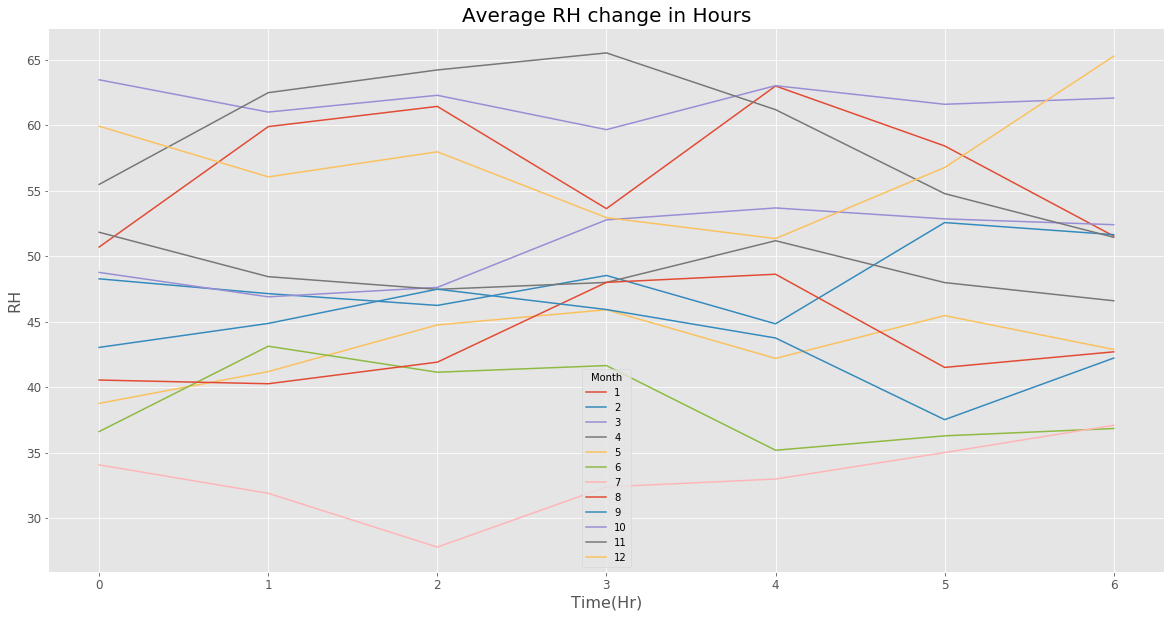

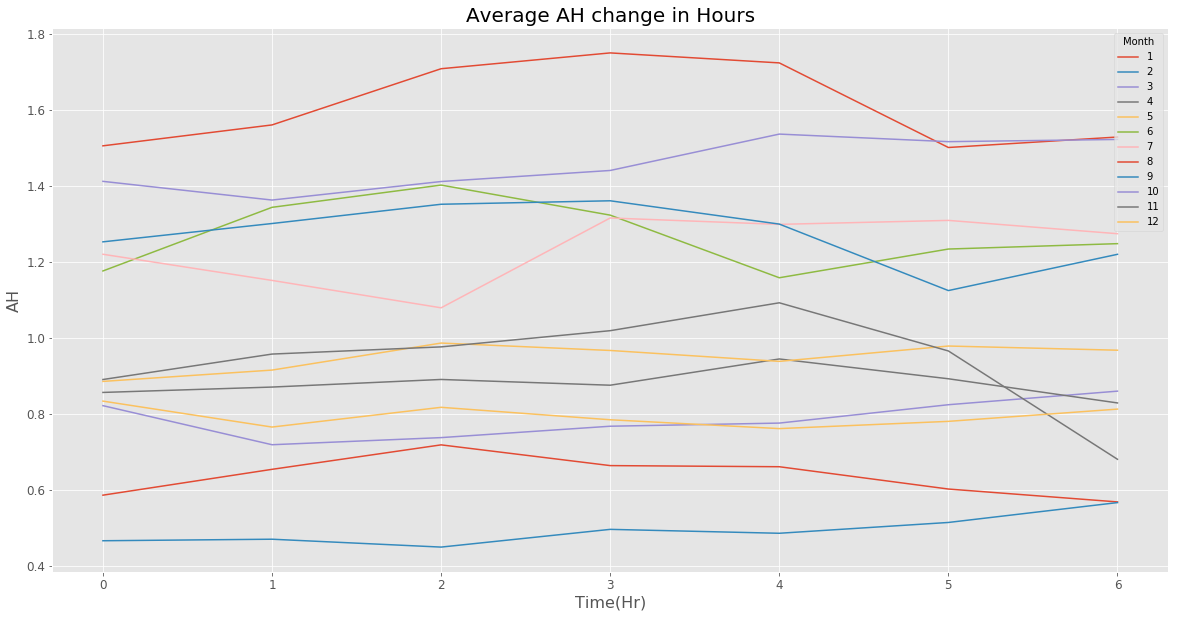

In [25]:
for col in AQcol:
    generate_weekday_plot(col)

In [35]:
df.head()

DateTime  idx        Date  Hour  Weekday  Week  Month  \
0  2004-03-10 18:00:00    0  2004-03-10    18        2    11      3   
1  2004-03-10 19:00:00    1  2004-03-10    19        2    11      3   
2  2004-03-10 20:00:00    2  2004-03-10    20        2    11      3   
3  2004-03-10 21:00:00    3  2004-03-10    21        2    11      3   
4  2004-03-10 22:00:00    4  2004-03-10    22        2    11      3   

   PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)  \
0       1360.0         1046.0        1056.0        1692.0       1268.0   
1       1292.0          955.0        1174.0        1559.0        972.0   
2       1402.0          939.0        1140.0        1555.0       1074.0   
3       1376.0          948.0        1092.0        1584.0       1203.0   
4       1272.0          836.0        1205.0        1490.0       1110.0   

   CO(GT)  C6H6(GT)  NOx(GT)  NO2(GT)     T    RH      AH  
0     2.6      11.9    166.0    113.0  13.6  48.9  0.7578  
1     2.0       9.4    103.0     92.0  13.3  47.7  0.7255  
2     2.2       9.0    131.0    114.0  11.9  54.0  0.7502  
3     2.2       9.2    172.0    122.0  11.0  60.0  0.7867  
4     1.6       6.5    131.0    116.0  11.2  59.6  0.7888